<a href="https://colab.research.google.com/github/yun-aha/GSTEC/blob/main/210721.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 1. Îî•Îü¨Îãù & Í∞ïÌôîÌïôÏäµ

$ ÏµúÏ†ÅÏùò ÌååÎùºÎØ∏ÌÑ∞ Ï∞æÍ∏∞ $
1. Îç∞Ïù¥ÌÑ∞ Î∂àÎü¨Ïò§Í∏∞
2. Îç∞Ïù¥ÌÑ∞ Î∂ÑÎ¶¨ÌïòÍ∏∞
3. ÌååÎùºÎØ∏ÌÑ∞ ÏÉùÏÑ±ÌïòÍ∏∞
4. Ïã†Í≤ΩÎßù Ïó∞ÏÇ∞
5. Ïó≠Ï†ÑÌåå Ïó∞ÏÇ∞
6. ÌèâÍ∞ÄÌïòÍ∏∞

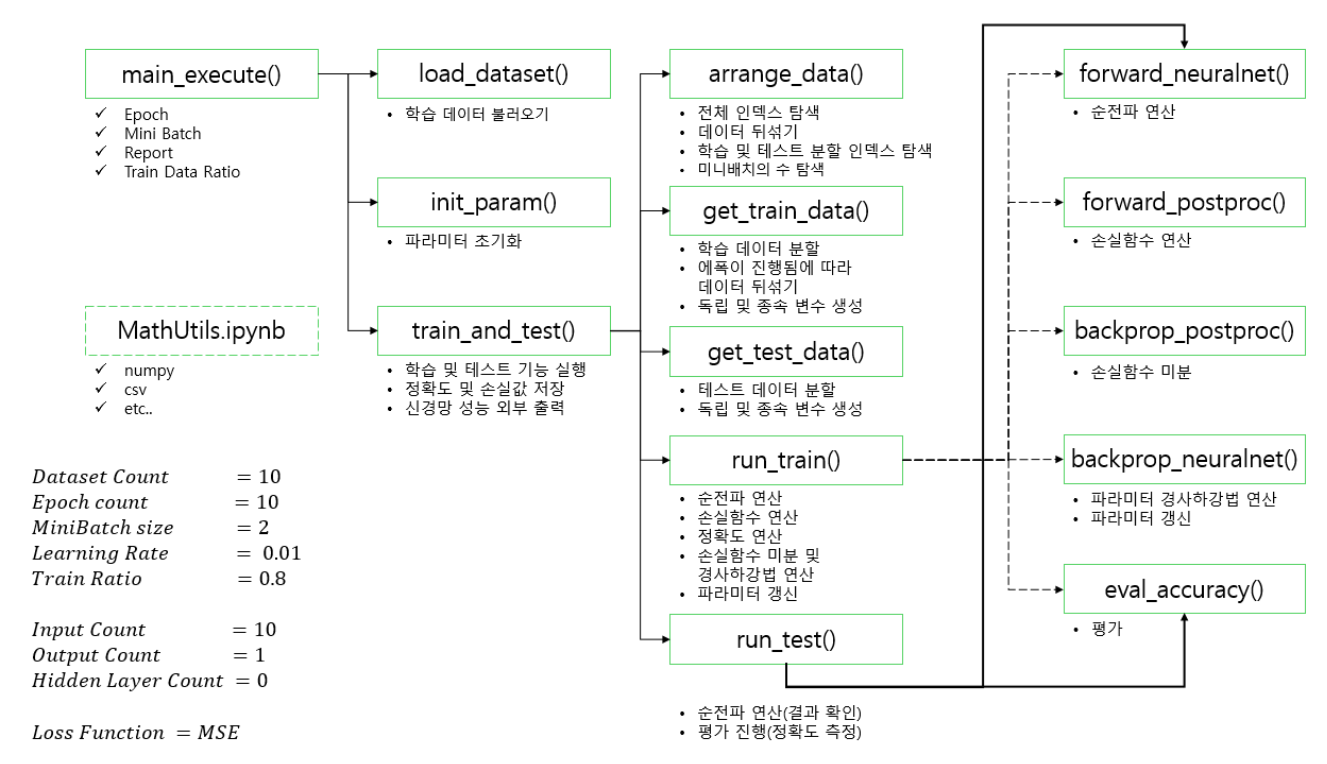

In [ ]:
import pandas as pd
import numpy as np

In [ ]:
df = pd.read_csv('/content/abalone_mini.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Sex             10 non-null     object 
 1   Length          10 non-null     float64
 2   Diameter        10 non-null     float64
 3   Height          10 non-null     float64
 4   Whole weight    10 non-null     float64
 5   Shucked weight  10 non-null     float64
 6   Viscera weight  10 non-null     float64
 7   Shell weight    10 non-null     float64
 8   Rings           10 non-null     int64  
dtypes: float64(7), int64(1), object(1)
memory usage: 848.0+ bytes


In [ ]:
def main_execute(epoch_count = 10, mb_size = 2, report = 2, train_ratio = 0.8):
  load_dataset()
  weight_initial, bias_initial = init_param()
  losses_mean_row, accs_mean_row, final_acc = train_and_test(epoch_count, mb_size, report, train_ratio)

  return weight_initial, bias_initial, loss_mean_row, accs_mean_row, final_acc


def load_dataset():      # Îç∞Ïù¥ÌÑ∞Î•º Î∂àÎü¨Ïò§Í≥†, ÏõêÌï´Î≤°ÌÑ∞Î•º Ïã§ÌñâÌï¥Ï§å
  with open('/content/abalone_mini.csv') as csvfile:
    csvreader = csv.reader(csvfile)
    next(csvreader)
    rows = []
    for row in csvreader:
      rows.append(row)

  global data, input_cnt, output_cnt
  input_cnt, output_cnt = 10, 1 
  data = np.zeros([len(rows), input_cnt + output_cnt])

  for n, row in enumerate(rows):
    if row[0] == 'M' : data[n, 0] = 1
    if row[0] == 'F' : data[n, 1] = 1
    if row[0] == 'I' : data[n, 2] = 1
    data[n, 3 : ] = row[1:]
    

In [ ]:
%run MathUtils.ipynb
load_dataset()

In [ ]:
data

array([[ 1.    ,  0.    ,  0.    ,  0.455 ,  0.365 ,  0.095 ,  0.514 ,
         0.2245,  0.101 ,  0.15  , 15.    ],
       [ 1.    ,  0.    ,  0.    ,  0.35  ,  0.265 ,  0.09  ,  0.2255,
         0.0995,  0.0485,  0.07  ,  7.    ],
       [ 0.    ,  1.    ,  0.    ,  0.53  ,  0.42  ,  0.135 ,  0.677 ,
         0.2565,  0.1415,  0.21  ,  9.    ],
       [ 1.    ,  0.    ,  0.    ,  0.44  ,  0.365 ,  0.125 ,  0.516 ,
         0.2155,  0.114 ,  0.155 , 10.    ],
       [ 0.    ,  0.    ,  1.    ,  0.33  ,  0.255 ,  0.08  ,  0.205 ,
         0.0895,  0.0395,  0.055 ,  7.    ],
       [ 1.    ,  0.    ,  0.    ,  0.5   ,  0.4   ,  0.13  ,  0.6645,
         0.258 ,  0.133 ,  0.24  , 12.    ],
       [ 0.    ,  0.    ,  1.    ,  0.355 ,  0.28  ,  0.085 ,  0.2905,
         0.095 ,  0.0395,  0.115 ,  7.    ],
       [ 0.    ,  1.    ,  0.    ,  0.44  ,  0.34  ,  0.1   ,  0.451 ,
         0.188 ,  0.087 ,  0.13  , 10.    ],
       [ 1.    ,  0.    ,  0.    ,  0.365 ,  0.295 ,  0.08  ,  0.2555,
 

In [ ]:
def init_model():
  global weight, bias 

  weight_initial = []
  bias_initial = []
  weight = np.random.normal(RND_MEAN, RND_STD, size=[input_cnt, output_cnt])
  bias = np.zeros([output_cnt])
  print("Initial Weight Value = \n{}".format(weight))
  print("Initial Bias Value = \n{}".format(bias))
  weight_initial.append(weight)
  bias_initial.append(bias)

  return weight_initial, bias_initial

In [ ]:
weight_initial, bias_initial = init_model()

Initial Weight Value = 
[[ 0.00332226]
 [-0.06785712]
 [-0.00352555]
 [-0.02117994]
 [ 0.01254554]
 [ 0.00879939]
 [-0.00728406]
 [ 0.02138244]
 [ 0.00242694]
 [-0.00714498]]
Initial Bias Value = 
[0.]


In [ ]:
def train_and_test():
  pass

def arrange_data(mb_size, train_ratio):
  global shuffle_map, test_begin_index

  shuffle_map = np.arange(data.shape[0])
  np.random.shuffle(shuffle_map)
  mini_batch_step_count = int(data.shape[0] * train_ratio) // mb_size
  test_begin_index = mini_batch_step_count * mb_size
  return mini_batch_step_count

In [ ]:
mini_batch_step_count = arrange_data(mb_size = 2, train_ratio = 0.8)

In [ ]:
print("mini_batch_step_count :", mini_batch_step_count)
print("shuffle_map : ", shuffle_map[:3])
print("test_begin_index : ", test_begin_index)

mini_batch_step_count : 4
shuffle_map :  [4 1 2]
test_begin_index :  8


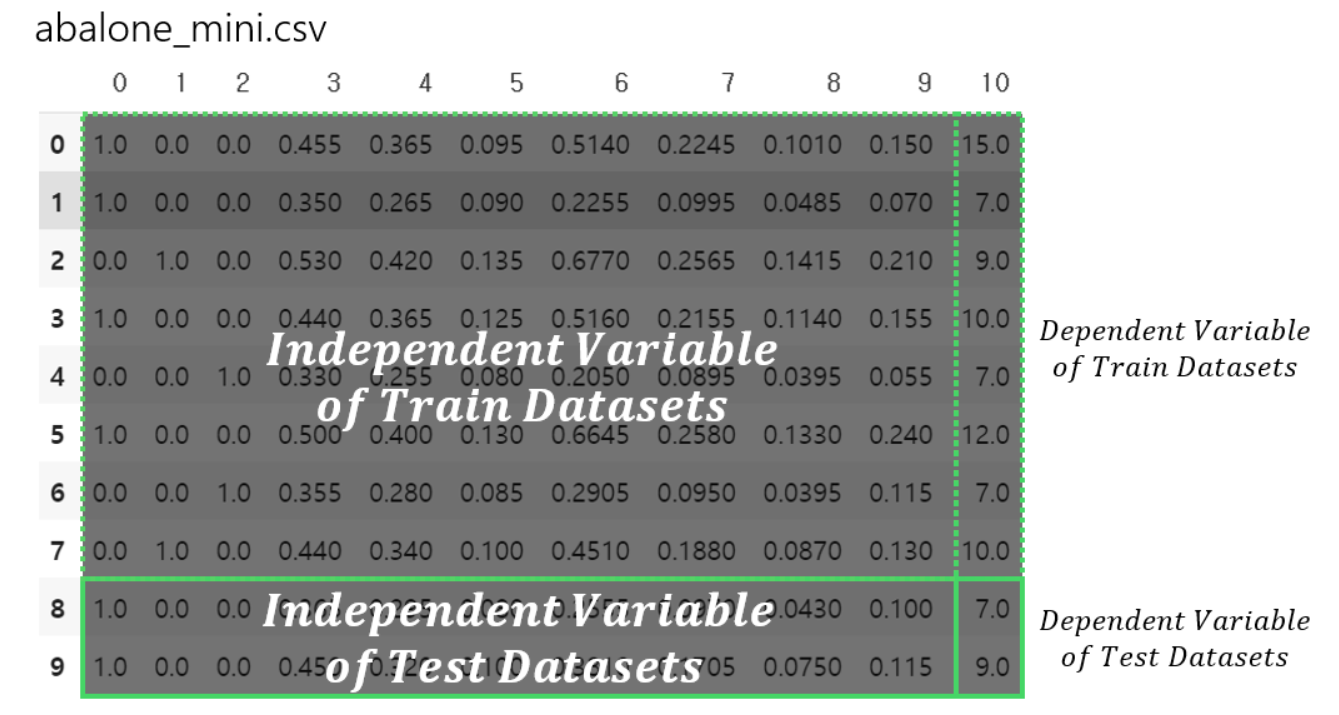

In [ ]:
def get_test_data():
  test_data = data[shuffle_map[test_begin_index:]]
  return test_data[:, : -output_cnt], test_data[:, -output_cnt:]


In [ ]:
test_x, test_y = get_test_data()
print(test_x)
print('---------------------------------------')
print(test_y)

[[1.     0.     0.     0.45   0.32   0.1    0.381  0.1705 0.075  0.115 ]
 [1.     0.     0.     0.44   0.365  0.125  0.516  0.2155 0.114  0.155 ]]
---------------------------------------
[[ 9.]
 [10.]]


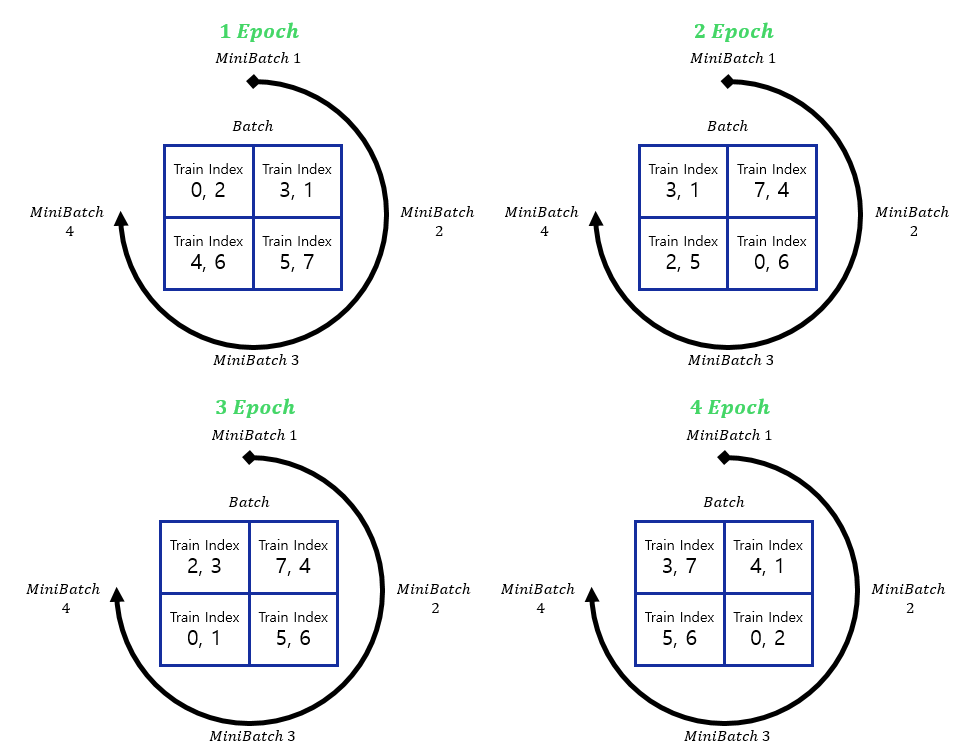

In [ ]:
def get_train_data(mb_size, n):
  if n == 0:
    np.random.shuffle(shuffle_map[:test_begin_index])

  train_data = data[shuffle_map[mb_size * n :  mb_size * (n+1) ]]
  
  return train_data[:, : -output_cnt], train_data[:, -output_cnt:]

In [ ]:
train_x, train_y = get_train_data(mb_size = 2, n = 0)
print(train_x)
print('================================')
print(train_y)

[[0.     1.     0.     0.53   0.42   0.135  0.677  0.2565 0.1415 0.21  ]
 [1.     0.     0.     0.35   0.265  0.09   0.2255 0.0995 0.0485 0.07  ]]
[[9.]
 [7.]]


In [ ]:
def run_test(x, y):
  accuracy = 100
  return accuracy

def run_train(x, y):
  loss = 0
  accuracy = 100
  return loss, accuracy

In [ ]:
run_train(0,0)

(0, 100)

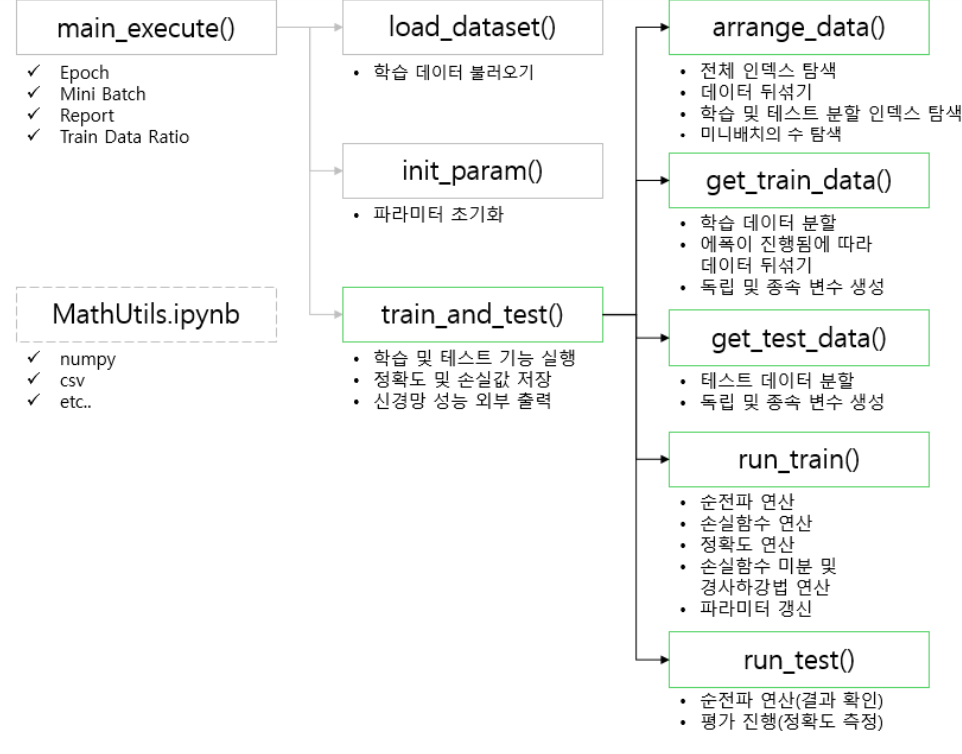

In [ ]:
def train_and_test(epoch_count, mb_size, report, train_ratio):
  mini_batch_step_count = arrange_data(mb_size, train_ratio)
  test_x, test_y = get_test_data()

  for epoch in range(epoch_count):
    losses = []
    accs = []
    for n in range(mini_batch_step_count):
      train_x, train_y = get_train_data(mb_size, n)
      loss, acc = run_train(train_x, train_y)
      losses.append(loss)
      accs.append(acc)

##########################


# 2. Î®∏Ïã†Îü¨Îãù

In [ ]:
!pip install mglearn
import mglearn
import sklearn
sklearn.__version__

     |‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 540 kB 31.9 MB/s 
  Created wheel for mglearn: filename=mglearn-0.1.9-py2.py3-none-any.whl size=582638 sha256=ae82a6ba5c1be2925150494b166f2258bb58576a59c5beefd756afcb63498232
  Stored in directory: /root/.cache/pip/wheels/f1/17/e1/1720d6dcd70187b6b6c3750cb3508798f2b1d57c9d3214b08b
Successfully built mglearn


'0.22.2.post1'

### ÏßÄÎèÑÌïôÏäµ - Í∑úÏ†úÏÑ†ÌòïÎ™®Îç∏(Ridge_Lasso_Regression)
Linear RegressionÏùò Î¨∏Ï†ú

- Îã®Ïàú ÏÑ†ÌòïÌöåÍ∑Ä : Îã® ÌïòÎÇòÏùò ÌäπÏÑ±(feature)ÏùÑ Í∞ÄÏßÄÍ≥† ÎùºÎ≤®Í∞í(label) ÎòêÎäî ÌÉÄÍπÉ(target)ÏùÑ ÏòàÏ∏°ÌïòÍ∏∞ ÏúÑÌïú
ÌöåÍ∑Ä Î™®Îç∏ÏùÑ Ï∞æÎäî Í≤É
- Îã§Ï§ë ÏÑ†ÌòïÌöåÍ∑Ä : Ïó¨Îü¨ Í∞úÏùò ÌäπÏÑ±ÏùÑ ÌôúÏö©Ìï¥ÏÑú ÌöåÍ∑ÄÎ™®Îç∏ÏùÑ Ï∞æÎäî Í≤É  

Îã§Ï§ë ÏÑ†Ìòï ÌöåÍ∑Ä Î™®Îç∏ÏùÄ Í≥ºÎåÄÏ†ÅÌï©(overfitting) Îê† ÎïåÍ∞Ä Ï¢ÖÏ¢Ö Î∞úÏÉù
Ï£ºÏñ¥ÏßÑ ÏÉòÌîåÎì§Ïùò ÌäπÏÑ±Í∞íÎì§Í≥º ÎùºÎ≤®Í∞íÏùò Í¥ÄÍ≥ÑÎ•º ÌïÑÏöîÏù¥ÏÉÅÏúºÎ°ú ÎÑàÎ¨¥ ÏûêÏÑ∏ÌïòÍ≤å Î≥µÏû°ÌïòÍ≤å Î∂ÑÏÑùÌñàÎã§Îäî Í≤É
- ÏÉàÎ°úÏö¥ Îç∞Ïù¥ÌÑ∞Í∞Ä Ï£ºÏñ¥Ï°åÏùÑ Îïå Ï†úÎåÄÎ°ú ÏòàÏ∏°Ìï¥ÎÇ¥Í∏∞Í∞Ä Ïñ¥Î†§ÏõÄ (ÏùºÎ∞òÌôî Îä•Î†•Ïù¥ Îñ®Ïñ¥Ïßê)
- Ridge / Lasso / Elastic Regression Îì±Ïû•



Bias(Ìé∏Ìñ•) Ïò§Ï∞®ÏôÄ Variance(Î∂ÑÏÇ∞) Ïò§Ï∞®

ÌäπÏÑ±Ïù¥ Ï¶ùÍ∞ÄÌïòÎ©¥ Î≥µÏû°ÏÑ±Ïù¥ Ï¶ùÍ∞Ä -> varianceÎäî Ï¶ùÍ∞Ä, biasÎäî Í∞êÏÜå -> Overfitting Î∞úÏÉù

<center>
 <img src="https://t1.daumcdn.net/cfile/tistory/99CDCC33599AC28F07" alt="Ìé∏Ìñ•Í≥º Î∂ÑÏÇ∞" width="40%" />

 Bias(Ìé∏Ìñ•) Ïò§Ï∞®ÏôÄ Variance(Î∂ÑÏÇ∞) Ïò§Ï∞®Î•º ÌëúÌòÑ

</center>

- bias Í∞êÏÜåÍ∞Ä varianceÏùò Ï¶ùÍ∞ÄÏôÄ Í∞ôÏïÑÏßÄÎäî ÏµúÏ†ÅÏùò pointÎ•º Ï∞æÏïÑÏïº Ìï®
- Overfitting Î¨∏Ï†ú Ìï¥Í≤∞ : Îç∞Ïù¥ÌÑ∞Ïùò Î≥µÏû°ÎèÑ Ï§ÑÏù¥Í∏∞, Ï†ïÍ∑úÌôîÎ•º ÌÜµÌïú Î∂ÑÏÇ∞ Í∞êÏÜå

<center>
 <img src="https://img1.daumcdn.net/thumb/R1280x0/?scode=mtistory2&fname=http%3A%2F%2Fcfile9.uf.tistory.com%2Fimage%2F996DB433599AC34225B9BD" alt="Î™®Îç∏ Î≥µÏû°ÎèÑ" width="40%" />

 Î™®Îç∏ Î≥µÏû°ÎèÑ

</center>



|Íµ¨Î∂Ñ| Î™®Îç∏ Î≥µÏû°ÎèÑ| Ï†ÅÌï©ÏÑ±|
|---|---|---|
|Bias Ïò§Ï∞®Í∞Ä ÎÇÆÏùÄ & Variance Ïò§Ï∞®Í∞Ä ÎÜíÏùÄ|Î≥µÏû°| Í≥ºÎåÄÏ†ÅÌï©(over fitting)|
 |Bias Ïò§Ï∞®Í∞Ä ÎÜíÏùÄ Variance Ïò§Ï∞®Í∞Ä ÎÇÆÏùÄ| Îã®Ïàú| Í≥ºÏÜåÏ†ÅÌï©(under fitting)|

* Bias(Ìé∏Ìñ•) ÏóêÎü¨Í∞Ä ÎÜíÏïÑÏßÄÎäî Í≤ÉÏùÄ  ÎßéÏùÄ Îç∞Ïù¥ÌÑ∞Î•º Í≥†Î†§ÌïòÏßÄ ÏïäÏïÑ (=Î™®Îç∏Ïù¥ ÎÑàÎ¨¥ Îã®Ïàú)  Ï†ïÌôïÌïú ÏòàÏ∏°ÏùÑ ÌïòÏßÄ Î™ªÌïòÎäî Í≤ΩÏö∞

* Variance(Î∂ÑÏÇ∞) ÏóêÎü¨Îäî ÎÖ∏Ïù¥Ï¶àÍπåÏßÄ Ï†ÑÎ∂Ä ÌïôÏäµÌïòÏó¨ (=Î™®Îç∏Ïù¥ ÎÑàÎ¨¥ Î≥µÏû°) ÏïΩÍ∞ÑÏùò inputÏóêÎèÑ ÏòàÏ∏° Y Í∞íÏù¥ ÌÅ¨Í≤å ÌùîÎì§Î¶¨Îäî Í≤É

Ïù¥ ÎëêÍ∞ÄÏßÄ ÏóêÎü¨Í∞Ä ÏÉÅÌò∏ Trade-off Í¥ÄÍ≥ÑÏóê ÏûàÏñ¥ÏÑú Ïù¥ ÎëòÏùÑ Î™®Îëê Ïû°Îäî Í≤ÉÏùÄ Î∂àÍ∞ÄÎä• Ìïú ÎîúÎ†àÎßàÍ∞Ä Î∞úÏÉù

Ï†ïÍ∑úÌôî(Regularization, Í∑úÏ†ú)

- Í≥ºÎåÄÏ†ÅÌï©Ïù¥ ÎêòÏßÄ ÏïäÎèÑÎ°ù Î™®Îç∏ÏùÑ Í∞ïÏ†úÎ°ú Ï†úÌïúÌïòÎäî Í≤ÉÏùÑ ÏùòÎØ∏.
- Í∞ÄÏ§ëÏπò(w)Ïùò Í∞íÏùÑ Ï°∞Ï†ïÌïòÏó¨ Ï†úÏïΩÏùÑ Ï£ºÎäî Í≤É.

- L1 Í∑úÏ†ú : Lasso
  - <font  color=yellow>wÏùò Î™®Îì† ÏõêÏÜåÏóê ÎòëÍ∞ôÏùÄ ÌûòÏúºÎ°ú Í∑úÏ†úÎ•º Ï†ÅÏö©ÌïòÎäî Î∞©Î≤ï. ÌäπÏ†ï Í≥ÑÏàòÎì§ÏùÄ 0Ïù¥ Îê®.      
  - ÌäπÏÑ±ÏÑ†ÌÉù(Feature Selection)Ïù¥ ÏûêÎèôÏúºÎ°ú Ïù¥Î£®Ïñ¥ÏßÑÎã§.</font>

- L2 Í∑úÏ†ú : Ridge
  - <font  color=yellow>wÏùò Î™®Îì† ÏõêÏÜåÏóê Í≥®Í≥†Î£® Í∑úÏ†úÎ•º Ï†ÅÏö©ÌïòÏó¨ 0Ïóê Í∞ÄÍπùÍ≤å ÎßåÎì†Îã§.</font>

### Ridge Regression
ÌèâÍ∑†Ï†úÍ≥±Ïò§Ï∞®ÏãùÏóê alpha Ìï≠Ïù¥ Ï∂îÍ∞Ä
- alpha Í∞íÏùÑ ÌÅ¨Í≤å ÌïòÎ©¥ Ìå®ÎÑêÌã∞ Ìö®Í≥ºÍ∞Ä Ïª§ÏßÄÍ≥†(Í∞ÄÏ§ëÏπò Í∞êÏÜå),
- alpha Í∞íÏùÑ ÏûëÍ≤å ÌïòÎ©¥ Í∑∏ Î∞òÎåÄÍ∞Ä ÎêúÎã§.
- Í∏∞Ï°¥ ÏÑ†ÌòïÌöåÍ∑ÄÏóêÏÑúÎäî Ï†ÅÏ†àÌïú Í∞ÄÏ§ëÏπòÏôÄ Ìé∏Ìñ•ÏùÑ Ï∞æÏïÑÎÇ¥Îäî Í≤ÉÏù¥ Í¥ÄÍ±¥
- Ï∂îÍ∞ÄÏ†ÅÏù∏ Ï†úÏïΩ Ï°∞Í±¥(Í∑úÏ†úÌï≠)ÏùÑ Ìè¨Ìï® ‚Äì Í∞ÄÏ§ëÏπòÏóê ÎåÄÌïú Ï†úÍ≥±Ïùò Ìï©ÏùÑ ÏÇ¨Ïö©
- <font  color=yellow>MSEÍ∞Ä ÏµúÏÜåÍ∞Ä ÎêòÍ≤å ÌïòÎäî Í∞ÄÏ§ëÏπò(w)ÏôÄ Ìé∏Ìñ•(b)ÏùÑ Ï∞æÎäî</font> ÎèôÏãúÏóê <font  color=yellow> MSEÏôÄ Í∑úÏ†úÌï≠Ïùò Ìï©Ïù¥ ÏµúÏÜå</font>Í∞Ä ÎêòÏñ¥Ïïº Ìï® -> Í∞ÄÏ§ëÏπò WÏùò Î™®Îì† ÏõêÏÜåÍ∞Ä 0Ïù¥ ÎêòÍ±∞ÎÇò 0Ïóê Í∑ºÏÇ¨ÌïòÎèÑÎ°ù -> <font  color=yellow>ÌïôÏäµÌïú Í∞ÄÏ§ëÏπò (W)Ïùò Ï†úÍ≥±ÏùÑ Í∑úÏ†úÌï≠ (L2 Í∑úÏ†ú)</font>ÏúºÎ°ú ÏÇ¨Ïö©

> \\( cost(W,b)\\ =MSE+Í∑úÏ†úÌï≠\\ =MSE+\alpha \cdot { L }_{ 2 }norm\\ =\cfrac { 1 }{ m } \sum\limits _{ i=1 }^{ m }{ (H({ x }^{ (i) })-{ y }^{ (i) }) } ^{ 2 }+\alpha \sum\limits _{ j=1 }^{ n }{ { w }_{ j }^{ 2 } } \\ (n : Í∞ÄÏ§ëÏπòÏùò Í∞úÏàò, Œ± : Í∑úÏ†úÏùò Ï†ïÎèÑ) \\)

> MSEÏóê ÏùòÌïú OverfittingÏùÑ Ï§ÑÏù¥Í∏∞ ÏúÑÌï¥ Œ±Î•º ÌÅ¨Í≤å Ìï® -> Ï†ïÌôïÎèÑ Í∞êÏÜå -> Œ±Í∞Ä ÎÑàÎ¨¥ ÌÅ¨Î©¥ MSEÏùò ÎπÑÏ§ëÏù¥ ÏûëÏïÑÏ†∏ÏÑú Í≥ºÏÜåÏ†ÅÌï© Í∞ÄÎä•ÏÑ± Ï¶ùÍ∞Ä

- Œ±Í∞Ä Ï¶ùÍ∞ÄÌïòÎ©¥ biasÎäî Ï¶ùÍ∞ÄÌïòÍ≥† varianceÎäî Í∞êÏÜåÌïòÎ©∞ Œ±Í∞Ä 0Ïù¥ ÎêòÎ©¥ MSEÏôÄ ÎèôÏùºÌïòÍ≤å ÎêòÏñ¥ ÏÑ†Ìòï ÌöåÍ∑ÄÎ™®Îç∏Ïù¥ Îê® -> Ridge Î™®Îç∏ÏùÄ <font  color=yellow>biasÏùÑ ÏïΩÍ∞Ñ ÏÜêÌï¥Î≥¥Î©¥ÏÑú varianceÎ•º ÌÅ¨Í≤å Ï§ÑÏó¨</font> ÏÑ±Îä•Ïùò Ìñ•ÏÉÅ
- Îã®Ï†ê : <font  color=yellow>Î™áÎ™á Î≥ÄÏàòÍ∞Ä Ï§ëÏöîÌïòÎçîÎùºÎèÑ Î™®Îì† Î≥ÄÏàòÏóê ÎåÄÌï¥ Ï†ÅÌï©ÏùÑ Ìï¥Ïïº ÌïòÍ≥† ÏôÑÎ≤ΩÌïú 0ÏùÄ ÎÇòÏò§ÏßÄ ÏïäÏùå</font> -> ÏòàÏ∏°Ïùò Î¨∏Ï†úÍ∞Ä ÏïÑÎãàÎùº Ìï¥ÏÑùÏùò Î¨∏Ï†ú


Ridge()
```
Ridge(alpha, fit_intercept, normalize, copy_X, max_iter, tol, solver, random_state)
```

- alpha : Í∞íÏù¥ ÌÅ¥ÏàòÎ°ù Í∞ïÎ†•Ìïú Ï†ïÍ∑úÌôî(Í∑úÏ†ú) ÏÑ§Ï†ïÌïòÏó¨ Î∂ÑÏÇ∞ÏùÑ Ï§ÑÏûÑ, ÏñëÏàòÎ°ú ÏÑ§Ï†ï
- fit_intercept : Î™®ÌòïÏóê ÏÉÅÏàòÌï≠ (Ï†àÌé∏)Ïù¥ ÏûàÎäîÍ∞Ä ÏóÜÎäîÍ∞ÄÎ•º Í≤∞Ï†ïÌïòÎäî Ïù∏Ïàò (default : True)
- normalize : Îß§Í∞úÎ≥ÄÏàò Î¨¥Ïãú Ïó¨Î∂Ä
- copy_X : XÏùò Î≥µÏÇ¨ Ïó¨Î∂Ä
- max_iter : Í≥ÑÏÇ∞Ïóê ÏÇ¨Ïö©Ìï† ÏûëÏóÖ Ïàò
- tol : Ï†ïÎ∞ÄÎèÑ
- solver : Í≥ÑÏÇ∞Ïóê ÏÇ¨Ïö©Ìï† ÏïåÍ≥†Î¶¨Ï¶ò (auto, svd, cholesky, lsqr, sparse_cg, sag, saga)
- random_state : ÎÇúÏàò seed ÏÑ§Ï†ï


#### Ridge_Lasso_Regression Ïã§Ïäµ 01

ÌôïÏû• Î≥¥Ïä§ÌÑ¥ ÏßëÍ∞í ÏÖãÏóê ÏÑ†ÌòïÌöåÍ∑Ä Ï†ÅÏö©

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet
%matplotlib inline

In [ ]:
# ÌôïÏû• Î≥¥Ïä§ÌÑ¥ ÏßëÍ∞í
import mglearn
from sklearn.model_selection import train_test_split

X, y = mglearn.datasets.load_extended_boston()
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)
X_train.shape

model = LinearRegression().fit(X_train, y_train)
print('ÌõàÎ†®Ï†êÏàò : ', model.score(X_train, y_train))
print('ÌÖåÏä§Ìä∏Ï†êÏàò : ', model.score(X_test,))

ÌõàÎ†®Ï†êÏàò :  0.9520519609032727
ÌÖåÏä§Ìä∏Ï†êÏàò :  0.607472195966557


ÌôïÏû• Î≥¥Ïä§ÌÑ¥ ÏßëÍ∞í ÏÖãÏóê Î¶øÏßÄÌöåÍ∑Ä Ï†ÅÏö©

In [ ]:
# model_ridge
model_ridge = Ridge().fit(X_train, y_train)
print('ÌõàÎ†®Ï†êÏàò : ', model_ridge.score(X_train, y_train))
print('ÌÖåÏä§Ìä∏Ï†êÏàò : ', model_ridge.score(X_test, y_test))

print('---------------------------------------------------')

# model_ridge_10
model_ridge_10 = Ridge(alpha=10).fit(X_train, y_train)
print('ÌõàÎ†®Ï†êÏàò : ', model_ridge_10.score(X_train, y_train))
print('ÌÖåÏä§Ìä∏Ï†êÏàò : ', model_ridge_10.score(X_test, y_test))

print('=====================================================')

model_ridge_01 = Ridge(alpha=0.1).fit(X_train, y_train)
print('ÌõàÎ†®Ï†êÏàò : ', model_ridge_01.score(X_train, y_train))
print('ÌÖåÏä§Ìä∏Ï†êÏàò : ', model_ridge_01.score(X_test, y_test))

ÌõàÎ†®Ï†êÏàò :  0.8857966585170941
ÌÖåÏä§Ìä∏Ï†êÏàò :  0.7527683481744751
---------------------------------------------------
ÌõàÎ†®Ï†êÏàò :  0.7882787115369614
ÌÖåÏä§Ìä∏Ï†êÏàò :  0.6359411489177309
ÌõàÎ†®Ï†êÏàò :  0.9282273685001992
ÌÖåÏä§Ìä∏Ï†êÏàò :  0.7722067936479818


(-25.0, 25.0)

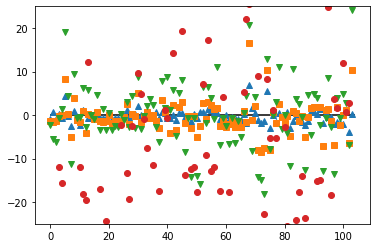

In [ ]:
plt.plot(model_ridge_10.coef_, '^', label='Ridge alpha=10')
plt.plot(model_ridge.coef_, 's', label='Ridge alpha=1')
plt.plot(model_ridge_01.coef_, 'v', label='Ridge alpha=0.1')
plt.plot(model.coef_, 'o', label='LinearRegression') #ÎßéÏù¥ ÌçºÏ†∏ÏûàÏñ¥ÏÑú, Î∂ÑÏÇ∞Ïù¥ ÎßéÏïÑÏÑú, Í≥ºÏ†ÅÌï©Ïù¥ ÏùºÏñ¥ÎÇ¨Îçò Í≤É

plt.hlines(0,0, len(model.coef_))   #ÏÑ†ÏùÑ Í∑∏Ïñ¥Ï§ÄÎã§. ÏÑ†ÏóêÏÑú Îñ®Ïñ¥ÏßàÏàòÎ°ù Í∞ÄÏ§ëÏπò Í∞íÏù¥ ÌÅ∞Í±∞.,
plt.ylim(-25, 25)

## Lasso Regression
- Î¶øÏßÄ ÌöåÍ∑ÄÏùò Îã®Ï†êÏùÑ Ìï¥Í≤∞ÌïòÍ∏∞ ÏúÑÌï¥ ÎåÄÏïàÏúºÎ°ú ÎÇòÏò® Î∞©Î≤ï
ÌïôÏäµÌïú Í∞ÄÏ§ëÏπòÏùò Ï†àÎåÄÍ∞íÏùÑ Í∑úÏ†úÌï≠(L1 Í∑úÏ†ú)ÏúºÎ°ú ÏÇ¨Ïö© ‚Äì Í∞ÄÏ§ëÏπòÏùò Ï†àÎåÄÍ∞íÏùò Ìï©ÏùÑ ÏÇ¨Ïö©
- ÌïôÏäµÌïú Í∞ÄÏ§ëÏπòÏùò Ï†àÎåÄÍ∞íÏùÑ Í∑úÏ†úÌï≠(L1 Í∑úÏ†ú)ÏúºÎ°ú ÏÇ¨Ïö© ‚Äì Í∞ÄÏ§ëÏπòÏùò Ï†àÎåÄÍ∞íÏùò Ìï©ÏùÑ ÏÇ¨Ïö©

>$$  \begin{align} 
cost(W,b)   \\ 
& =MSE+Í∑úÏ†úÌï≠ \\  
& =MSE+\alpha \cdot { L }_{ 1 }norm \\  
& =\cfrac { 1 }{ m } \sum\limits_{ i=1 }^{ m }{ (H({ x }^{ (i) })-{ y }^{ (i) }) } ^{ 2 }+\alpha \sum\limits_{ j=1 }^{ n }{ \left| { w }_{ j } \right|  }  \\
& (n:Í∞ÄÏ§ëÏπòÏùòÍ∞úÏàò,Œ±:Í∑úÏ†úÏùòÏ†ïÎèÑ)  \end{align} $$


- Ï†ÅÎãπÌïú Œ±ÎßåÏúºÎ°ú Î™áÎ™á Í≥ÑÏàòÎ•º Ï†ïÌôïÌïòÍ≤å 0ÏúºÎ°ú ÎßåÎì§ Ïàò ÏûàÏùå -> Ìï¥ÏÑùÏùÑ Ïö©Ïù¥ÌïòÍ≤å Ìï®
- MSEÏôÄ Í∑úÏ†úÌï≠Ïùò Ìï©Ïù¥ ÏµúÏÜåÍ∞Ä ÎêòÍ≤å ÌïòÎäî ÌååÎùºÎØ∏ÌÑ∞ WÏôÄ bÎ•º Ï∞æÎäî Í≤ÉÏù¥ LassoÏùò Î™©Ìëú
- MSEÌï≠Ïù¥ ÏûëÏïÑÏßà ÏàòÎ°ù Ïò§Ï∞®Í∞Ä ÏûëÏïÑÏßÄÍ≥†, L1-normÏù¥ ÏûëÏïÑÏßà ÏàòÎ°ù ÎßéÏùÄ Í∞ÄÏ§ëÏπòÎì§Ïù¥ 0Ïù¥ ÎêòÍ±∞ÎÇò 0Ïóê Í∞ÄÍπåÏõåÏßê -> Îç∞Ïù¥ÌÑ∞ Ï†Ñ Ï≤òÎ¶¨Ïóê Ï£ºÎ°ú ÏÇ¨Ïö© (ÌïÑÏöî ÏóÜÎäî Îç∞Ïù¥ÌÑ∞ Ï†úÍ±∞)
- RidgeÏôÄ LassoÏùò ÏÑ±Îä• Ï∞®Ïù¥Îäî ÏÇ¨Ïö©ÌïòÎäî Îç∞Ïù¥ÌÑ∞Ïùò ÏÉÅÌô©Ïóê Îî∞Îùº Îã§Î¶Ñ -> Ïú†ÏùòÎØ∏Ìïú Î≥ÄÏàòÍ∞Ä Ï†ÅÏùÑ ÎïåÎäî LassoÍ∞Ä Î∞òÎåÄÏùò Í≤ΩÏö∞Îäî RidgeÍ∞Ä Îçî Ï¢ãÏùÄ ÏÑ±Îä•ÏùÑ Î≥¥ÏûÑ.

Lasso()
```
Lasso(alpha, fit_intercept, normalize, precompute, copy_X, max_iter, tol, warm_start, positive, solver, random_state, selection)
```
- alpha : Í∞íÏù¥ ÌÅ¥ÏàòÎ°ù Í∞ïÎ†•Ìïú Ï†ïÍ∑úÌôî(Í∑úÏ†ú) ÏÑ§Ï†ïÌïòÏó¨ Î∂ÑÏÇ∞ÏùÑ Ï§ÑÏûÑ, ÏñëÏàòÎ°ú ÏÑ§Ï†ï
- fit_intercept : Î™®ÌòïÏóê ÏÉÅÏàòÌï≠ (Ï†àÌé∏)Ïù¥ ÏûàÎäîÍ∞Ä ÏóÜÎäîÍ∞ÄÎ•º Í≤∞Ï†ïÌïòÎäî Ïù∏Ïàò (default : True)
- normalize : Îß§Í∞úÎ≥ÄÏàò Î¨¥Ïãú Ïó¨Î∂Ä
- precompute : Í≥ÑÏÇ∞ÏÜçÎèÑÎ•º ÎÜíÏù¥Í∏∞ ÏúÑÌï¥ ÎØ∏Î¶¨ Í≥ÑÏÇ∞Îêú Í∑∏Îû® Îß§Ìä∏Î¶≠Ïä§Î•º ÏÇ¨Ïö©Ìï† Í≤ÉÏù∏ÏßÄ Ïó¨Î∂Ä
- copy_X : XÏùò Î≥µÏÇ¨ Ïó¨Î∂Ä
- max_iter : Í≥ÑÏÇ∞Ïóê ÏÇ¨Ïö©Ìï† ÏûëÏóÖ Ïàò
- tol : Ï†ïÎ∞ÄÎèÑ
- warm_start : Ïù¥Ï†Ñ Î™®Îç∏ÏùÑ Ï¥àÍ∏∞ÌôîÎ°ú Ï†ÅÌï©ÌïòÍ≤å ÏÇ¨Ïö©Ìï† Í≤ÉÏù∏ÏßÄ Ïó¨Î∂Ä
- positive : Í≥ÑÏàòÍ∞Ä ÏñëÏàòÎ°ú ÏÇ¨Ïö©Ìï† Í≤ÉÏù∏ÏßÄ Ïó¨Î∂Ä
- solver : Í≥ÑÏÇ∞Ïóê ÏÇ¨Ïö©Ìï† ÏïåÍ≥†Î¶¨Ï¶ò (auto, svd, cholesky, lsqr, sparse_cg, sag, saga)
- random_state : ÎÇúÏàò seed ÏÑ§Ï†ï
- selection : Í≥ÑÏàòÏùò ÏóÖÎç∞Ïù¥Ìä∏ Î∞©Î≤ï ÏÑ§Ï†ï (randomÏúºÎ°ú ÏÑ§Ï†ïÌïòÎ©¥ tolÏù¥ 1e-4Î≥¥Îã§ ÎÜíÏùÑ Îïå Îπ†Î•∏ ÏàòÎ†¥)

In [ ]:
from sklearn.linear_model import Lasso

# lasso
model_lasso = Lasso().fit(X_train, y_train)

print('ÌõàÎ†®Ï†êÏàò:', model_lasso.score(X_train, y_train) )
print('ÌÖåÏä§Ìä∏Ï†êÏàò:', model_lasso.score(X_test, y_test) )
model_lasso.coef_   #ÌäπÏÑ±ÏùÑ 4Í∞úÎßå Ïç®ÏÑú Ï†êÏàòÍ∞Ä ÎÇÆÏùå(Í≥ºÏÜåÏ†ÅÌï©)
print('ÏÇ¨Ïö©Ìïú ÌäπÏÑ± Ïàò:', np.sum( model_lasso.coef_ != 0 ) ) #0Ïù¥ ÏïÑÎãå Í∞íÏùò Í∞úÏàòÍ∞Ä ÎÇòÏò®Îã§.

ÌõàÎ†®Ï†êÏàò: 0.29323768991114607
ÌÖåÏä§Ìä∏Ï†êÏàò: 0.20937503255272294
ÏÇ¨Ïö©Ìïú ÌäπÏÑ± Ïàò: 4


In [ ]:
from sklearn.linear_model import Lasso

# lasso
model_lasso_001 = Lasso(alpha=0.01, max_iter=10000).fit(X_train, y_train)

print('ÌõàÎ†®Ï†êÏàò:', model_lasso_001.score(X_train, y_train) )
print('ÌÖåÏä§Ìä∏Ï†êÏàò:', model_lasso_001.score(X_test, y_test) )
model_lasso.coef_   #ÌäπÏÑ±ÏùÑ 4Í∞úÎßå Ïç®ÏÑú Ï†êÏàòÍ∞Ä ÎÇÆÏùå(Í≥ºÏÜåÏ†ÅÌï©)
print('ÏÇ¨Ïö©Ìïú ÌäπÏÑ± Ïàò:', np.sum( model_lasso_001.coef_ != 0 ) ) #0Ïù¥ ÏïÑÎãå Í∞íÏùò Í∞úÏàòÍ∞Ä ÎÇòÏò®Îã§.

ÌõàÎ†®Ï†êÏàò: 0.8962226511086497
ÌÖåÏä§Ìä∏Ï†êÏàò: 0.7656571174549982
ÏÇ¨Ïö©Ìïú ÌäπÏÑ± Ïàò: 33


In [ ]:
from sklearn.linear_model import Lasso

# lasso
model_lasso_00001 = Lasso(alpha=0.0001, max_iter=10000).fit(X_train, y_train)

print('ÌõàÎ†®Ï†êÏàò:', model_lasso_00001.score(X_train, y_train) )
print('ÌÖåÏä§Ìä∏Ï†êÏàò:', model_lasso_00001.score(X_test, y_test) )
model_lasso.coef_   #ÌäπÏÑ±ÏùÑ 4Í∞úÎßå Ïç®ÏÑú Ï†êÏàòÍ∞Ä ÎÇÆÏùå(Í≥ºÏÜåÏ†ÅÌï©)
print('ÏÇ¨Ïö©Ìïú ÌäπÏÑ± Ïàò:', np.sum( model_lasso_00001.coef_ != 0 ) ) #0Ïù¥ ÏïÑÎãå Í∞íÏùò Í∞úÏàòÍ∞Ä ÎÇòÏò®Îã§.

ÌõàÎ†®Ï†êÏàò: 0.9501169448631187
ÌÖåÏä§Ìä∏Ï†êÏàò: 0.6506993940304697
ÏÇ¨Ïö©Ìïú ÌäπÏÑ± Ïàò: 97


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 653.181797420264, tolerance: 3.233182126649076
  positive)


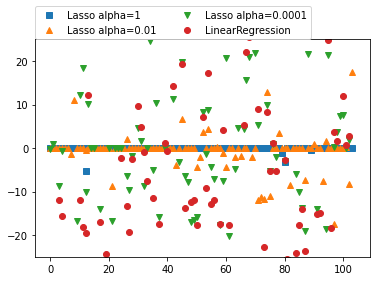

In [ ]:
plt.plot(model_lasso.coef_, 's', label='Lasso alpha=1')
plt.plot(model_lasso_001.coef_, '^', label='Lasso alpha=0.01')
plt.plot(model_lasso_00001.coef_, 'v', label='Lasso alpha=0.0001')

plt.plot(model.coef_, 'o', label='LinearRegression')
plt.hlines(0, 0, len(model.coef_))
plt.ylim(-25, 25)
plt.legend(ncol=2, loc=(0,1))

## ElasticNet Regression
- ÏÑ†Ìòï ÌöåÍ∑ÄÏóê 2Í∞ÄÏßÄ Í∑úÏ†úÌï≠ (L1 Í∑úÏ†úÌï≠, L2 Í∑úÏ†úÌï≠)ÏùÑ Ï∂îÍ∞ÄÌïú Í≤É

> \begin{align}
cost(W,b)\\ 
& =MSE+Í∑úÏ†úÌï≠\\
& =MSE+ { \alpha }_{ 1 }\cdot { L }_{ 1 }norm + { \alpha }_{ 2 }\cdot { L }_{ 2 }norm\\
& =\cfrac { 1 }{ m } \sum\limits _{ i=1 }^{ m }{ (H({ x }^{ (i) })-{ y }^{ (i) }) } ^{ 2 } +\alpha _{ 1 }\sum\limits _{ j=1 }^{ n }{ \left| { w }_{ j } \right|  +\alpha _{ 2 }\sum\limits_{ j=1 }^{ n }{ { w }_{ j }^{ 2 } } } \\
& (n:Í∞ÄÏ§ëÏπòÏùòÍ∞úÏàò,Œ±:Í∑úÏ†úÏùòÏ†ïÎèÑ) \end{align}

ElasticNet()
```
ElasticNet(alpha, l1_ratio, fit_intercept, normalize, precompute, max_iter, copy_X,
tol, warm_start, positive, random_state, selection)
```
- alpha : Í∞íÏù¥ ÌÅ¥ÏàòÎ°ù Í∞ïÎ†•Ìïú Ï†ïÍ∑úÌôî(Í∑úÏ†ú) ÏÑ§Ï†ïÌïòÏó¨ Î∂ÑÏÇ∞ÏùÑ Ï§ÑÏûÑ, ÏñëÏàòÎ°ú ÏÑ§Ï†ï
- l1_ratio : L1 Í∑úÏ†úÏùò ÎπÑÏú® (ÌòºÌï©ÎπÑÏú®?)
- fit_intercept : Î™®ÌòïÏóê ÏÉÅÏàòÌï≠ (Ï†àÌé∏)Ïù¥ ÏûàÎäîÍ∞Ä ÏóÜÎäîÍ∞ÄÎ•º Í≤∞Ï†ïÌïòÎäî Ïù∏Ïàò (default : True)
- normalize : Îß§Í∞úÎ≥ÄÏàò Î¨¥Ïãú Ïó¨Î∂Ä
- precompute : Í≥ÑÏÇ∞ÏÜçÎèÑÎ•º ÎÜíÏù¥Í∏∞ ÏúÑÌï¥ ÎØ∏Î¶¨ Í≥ÑÏÇ∞Îêú Í∑∏Îû® Îß§Ìä∏Î¶≠Ïä§Î•º ÏÇ¨Ïö©Ìï† Í≤ÉÏù∏ÏßÄ Ïó¨Î∂Ä
- copy_X : XÏùò Î≥µÏÇ¨ Ïó¨Î∂Ä
- max_iter : Í≥ÑÏÇ∞Ïóê ÏÇ¨Ïö©Ìï† ÏûëÏóÖ Ïàò
- tol : Ï†ïÎ∞ÄÎèÑ
- warm_start : Ïù¥Ï†Ñ Î™®Îç∏ÏùÑ Ï¥àÍ∏∞ÌôîÎ°ú Ï†ÅÌï©ÌïòÍ≤å ÏÇ¨Ïö©Ìï† Í≤ÉÏù∏ÏßÄ Ïó¨Î∂Ä
- positive : Í≥ÑÏàòÍ∞Ä ÏñëÏàòÎ°ú ÏÇ¨Ïö©Ìï† Í≤ÉÏù∏ÏßÄ Ïó¨Î∂Ä
- random_state : ÎÇúÏàò seed ÏÑ§Ï†ï
- selection : Í≥ÑÏàòÏùò ÏóÖÎç∞Ïù¥Ìä∏ Î∞©Î≤ï ÏÑ§Ï†ï (randomÏúºÎ°ú ÏÑ§Ï†ïÌïòÎ©¥ tolÏù¥ 1e-4Î≥¥Îã§ ÎÜíÏùÑ Îïå Îπ†Î•∏ ÏàòÎ†¥)

## Îã§Ìï≠ÌöåÍ∑Ä

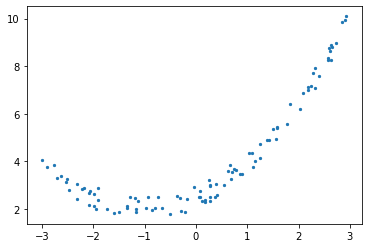

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

n = 100
x = 6 * np.random.rand(n, 1) - 3
y = 0.5 * x**2 + 1 * x + 2 + np.random.rand(n, 1)
plt.scatter(x, y, s=5)

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures

# Îç∞Ïù¥ÌÑ∞ Î≥ÄÌôò Í≥ºÏ†ïÍ≥º Î®∏Ïã†Îü¨ÎãùÏùÑ Ïó∞Í≤∞Ìï¥Ï£ºÎäî ÌååÏù¥ÌîÑÎùºÏù∏
from sklearn.pipeline import make_pipeline  

poly_features = PolynomialFeatures(degree=2, include_bias=False)
x_poly = poly_features.fit_transform(x)
x.shape, x_poly.shape

((100, 1), (100, 2))

In [ ]:
x[0], x_poly[0]   # (array([-2.32495759]), array([-2.32495759,  5.40542778]))

model = LinearRegression().fit(x_poly, y)
model.coef_, model.intercept_   # (array([[1.00772136, 0.51179524]]), array([2.46168853]))

model_lr = make_pipeline(PolynomialFeatures(2, include_bias=False),
                         LinearRegression())
model_lr.fit(x, y)

Pipeline(memory=None,
         steps=[('polynomialfeatures',
                 PolynomialFeatures(degree=2, include_bias=False,
                                    interaction_only=False, order='C')),
                ('linearregression',
                 LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
                                  normalize=False))],
         verbose=False)

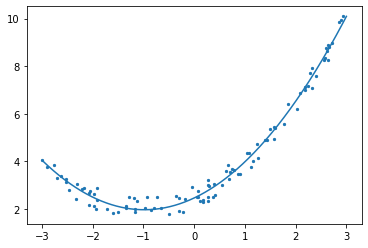

In [ ]:
# Îã§Ìï≠ÌöåÍ∑Ä Í∑∏ÎûòÌîÑ
plt.scatter(x, y, s=5)
xx = np.linspace(-3, 3, 1000)
y_pred = model_lr.predict(xx.reshape(-1,1)) # xx[:, np.newaxis]  Îûë Í∞ôÏùÄ Îúª 1Ï∞®ÏõêÏùÑ 2Ï∞®ÏõêÏúºÎ°ú

plt.plot(xx, y_pred)

#### PolynomialFeatures()
```
PolynomialFeatures(degree=2, *, interaction_only=False, include_bias=True)
```

- degree : Ï∞®Ïàò
- interaction_only: TrueÎ©¥ 2Ï∞®Ìï≠ÏóêÏÑú ÏÉÅÌò∏ÏûëÏö©Ìï≠Îßå Ï∂úÎ†•
- include_bias : ÏÉÅÏàòÌï≠ ÏÉùÏÑ± Ïó¨Î∂Ä


Îã§Ìï≠ Î≥ÄÌôò

- ÏûÖÎ†•Í∞í  x Î•º Îã§Ìï≠ÏãùÏúºÎ°ú Î≥ÄÌôòÌïúÎã§.

> \\( x \;\; \rightarrow \;\; [ 1, x, x^2, x^3, \cdots ] \\) <br>
 
> ÎßåÏïΩ Ïó¥Ïùò Í∞ØÏàòÍ∞Ä Îëê Í∞úÏù¥Í≥† 2Ï∞® Îã§Ìï≠ÏãùÏúºÎ°ú Î≥ÄÌôòÌïòÎäî Í≤ΩÏö∞ÏóêÎäî Îã§ÏùåÏ≤òÎüº Î≥ÄÌôòÌïúÎã§.

> \\( [x_1, x_2] \;\; \rightarrow \;\; [ 1, x_1, x_2, x_1^2, x_1x_2, x_2^2 ] \\)  <br>

> Ïòà) <br>
> \\( [x_1=0, x_2=1]  \;\; \rightarrow \;\; [1, 0, 1, 0, 0, 1] \\) <br>

> \\( [x_1=2, x_2=3]  \;\; \rightarrow \;\; [1,2,3,4,6,9] \\)
 


In [ ]:
from sklearn.preprocessing import PolynomialFeatures
X = np.arange(6).reshape(3,2)
X

array([[0, 1],
       [2, 3],
       [4, 5]])

In [ ]:
poly = PolynomialFeatures(2, include_bias=False)
poly.fit_transform(X)

array([[ 0.,  1.,  0.,  0.,  1.],
       [ 2.,  3.,  4.,  6.,  9.],
       [ 4.,  5., 16., 20., 25.]])

In [ ]:
# Îã§Ìï≠Ï∞®ÏàòÎäî Ï†ÅÏö©ÌïòÏßÄ ÏïäÍ≥†, Ïò§ÏßÅ ÏÉÅÌò∏ÏûëÏö©(ÍµêÌò∏ÏûëÏö©) Ìö®Í≥ºÎßåÏùÑ Î∂ÑÏÑùÌïòÎ†§Î©¥ 
# interaction_only=True ÏòµÏÖòÏùÑ ÏÑ§Ï†ïÌï¥Ï£ºÎ©¥ Îê©ÎãàÎã§. 
# degreeÎ•º Í∞ÄÏßÄÍ≥† ÍµêÌò∏ÏûëÏö©ÏùÑ Î™á Í∞ú ÏàòÏ§ÄÍπåÏßÄ Î≥ºÏßÄ ÏÑ§Ï†ïÌï¥Ï§Ñ Ïàò ÏûàÏäµÎãàÎã§.

poly = PolynomialFeatures(2, interaction_only=True)
poly.fit_transform(X)

array([[ 1.,  0.,  1.,  0.],
       [ 1.,  2.,  3.,  6.],
       [ 1.,  4.,  5., 20.]])

## Linear / Ridge / Lasso / ElasticNet RegressionÏùò ÎπÑÍµê
|Íµ¨Î∂Ñ| Î¶øÏßÄÌöåÍ∑Ä| ÎùºÏèòÌöåÍ∑Ä| ÏóòÎùºÏä§Ìã±ÎÑ∑|
|---|---|---|---|
|Ï†úÏïΩÏãù| L2 norm| L1 norm| L1+L2 norm|
|Î≥ÄÏàòÏÑ†ÌÉù |Î∂àÍ∞ÄÎä•| Í∞ÄÎä•| Í∞ÄÎä•|
|solution| closed form| Î™ÖÏãúÌï¥ ÏóÜÏùå| Î™ÖÏãúÌï¥ ÏóÜÏùå|
|Ïû•Ï†ê| Î≥ÄÏàòÍ∞Ñ ÏÉÅÍ¥ÄÍ¥ÄÍ≥ÑÍ∞Ä ÎÜíÏïÑÎèÑ Ï¢ãÏùÄ ÏÑ±Îä•| Î≥ÄÏàòÍ∞Ñ ÏÉÅÍ¥ÄÍ¥ÄÍ≥ÑÍ∞Ä ÎÜíÏúºÎ©¥ ÏÑ±Îä•‚Üì| Î≥ÄÏàòÍ∞Ñ ÏÉÅÍ¥ÄÍ¥ÄÍ≥ÑÎ•º Î∞òÏòÅÌïú Ï†ïÍ∑úÌôî|
|ÌäπÏßï| ÌÅ¨Í∏∞Í∞Ä ÌÅ∞ Î≥ÄÏàòÎ•º Ïö∞ÏÑ† Ï†ÅÏúºÎ°ú Ï§ÑÏûÑ|ÎπÑÏ§ëÏöî Î≥ÄÏàòÎ•º Ïö∞ÏÑ†Ï†Å ÏúºÎ°ú Ï§ÑÏûÑ|ÏÉÅÍ¥ÄÍ¥ÄÍ≥ÑÍ∞Ä ÌÅ∞ Î≥ÄÏàòÎ•º ÎèôÏãúÏóê ÏÑ†ÌÉù/Î∞∞Ï†ú|

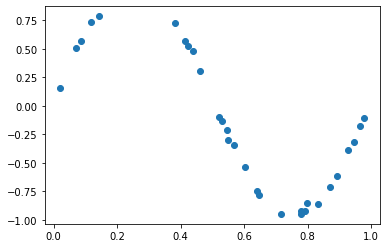

In [ ]:
import seaborn as sb

np.random.seed(0)
n_samples = 30
X = np.sort(np.random.rand(n_samples))
y = np.sin(2 * np.pi * X) + np.random.rand(n_samples) * 0.1   #+np.random.rand(n_samples) ÎÖ∏Ïù¥Ï¶à Ï∂îÍ∞Ä, 0.1ÏùÑ Í≥±Ìïú Ïù¥Ïú†Îäî ÎÖ∏Ïù¥Ï¶àÎ•º ÏïΩÍ∞ÑÎßå Ï≤®Í∞ÄÌïòÍ∏∞ ÏúÑÌï®
plt.scatter(X, y)

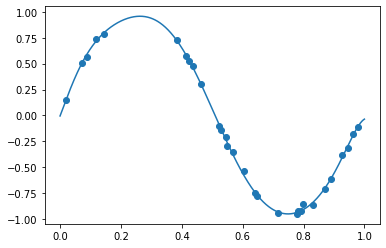

In [ ]:
model_lr = make_pipeline(PolynomialFeatures(9), LinearRegression())
model_lr.fit(X.reshape(-1,1),y)    

xx = np.linspace(0, 1, 1000)
y_pred = model_lr.predict(xx.reshape(-1,1))
plt.plot(xx, y_pred)
plt.scatter(X, y)

[ 0.00000000e+00  1.26425945e+02 -3.58763053e+03  5.21036577e+04
 -4.14500987e+05  1.80879567e+06 -3.38004007e+06 -6.02645667e+06
  5.58428631e+07 -1.69825084e+08  3.08627084e+08 -3.68963718e+08
  2.93845569e+08 -1.50695506e+08  4.51474177e+07 -6.01506596e+06]


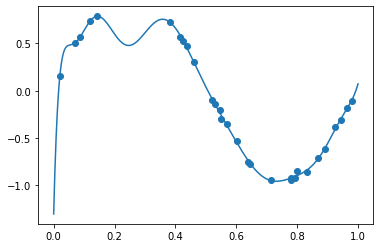

In [ ]:
model_lr = make_pipeline(PolynomialFeatures(15), LinearRegression())
model_lr.fit(X.reshape(-1, 1), y)
print(model_lr.steps[1][1].coef_)

xx = np.linspace(0, 1, 1000)
y_pred = model_lr.predict( xx.reshape(-1, 1) )
plt.plot(xx, y_pred)
plt.scatter(X, y)
## Í≥ºÏ†ÅÌï©

[  0.           5.65357337 -10.82011053  -5.05521144   2.04506098
   5.48450212   5.3744445    2.91519199  -0.77584474  -4.91141149]


(-1.5, 1.5)

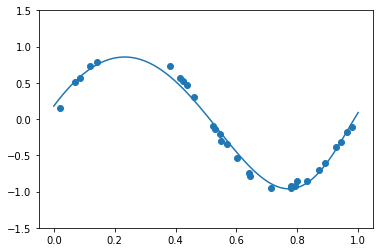

In [ ]:
model_lr = make_pipeline(PolynomialFeatures(9), Ridge(alpha=0.001))
model_lr.fit(X.reshape(-1, 1), y)
print(model_lr.steps[1][1].coef_)

xx = np.linspace(0, 1, 1000)
y_pred = model_lr.predict( xx.reshape(-1, 1) )
plt.plot(xx, y_pred)
plt.scatter(X, y)
plt.ylim(-1.5, 1.5)

[  0.           7.70882088 -17.94356743   0.97862541   5.01323205
   4.40469423   2.54515109   0.60831493  -1.00290423  -2.27062685]


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.06017318456406588, tolerance: 0.0010052499746308068
  positive)


(-1.5, 1.5)

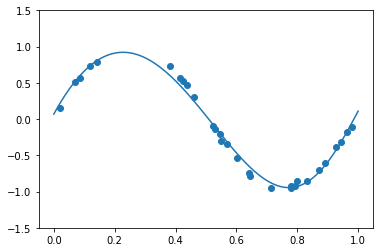

In [ ]:
model_lr = make_pipeline(PolynomialFeatures(9), Lasso(alpha=0.000001))
model_lr.fit(X.reshape(-1, 1), y)
print(model_lr.steps[1][1].coef_)

xx = np.linspace(0, 1, 1000)
y_pred = model_lr.predict( xx.reshape(-1, 1) )
plt.plot(xx, y_pred)
plt.scatter(X, y)
plt.ylim(-1.5, 1.5)

[  0.           8.49912005 -18.75192948  -0.           2.53141245
  10.6688774    1.00775511   0.          -0.          -3.91533473]


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.019880201718013635, tolerance: 0.0010052499746308068
  positive)


(-1.5, 1.5)

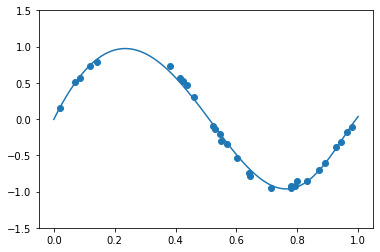

In [ ]:
model_lr = make_pipeline(PolynomialFeatures(9), 
                         ElasticNet(alpha=0.0001, l1_ratio=1.0, max_iter=10000))
model_lr.fit(X.reshape(-1, 1), y)
print( model_lr.steps[1][1].coef_ )

xx = np.linspace(0, 1, 1000)
y_pred = model_lr.predict( xx.reshape(-1, 1) )
plt.plot(xx, y_pred)
plt.scatter(X, y)
plt.ylim(-1.5, 1.5)

# 3. ÎπÖÎç∞Ïù¥ÌÑ∞ Î∂ÑÏÑù

## 3: Ïó∞ÏÜçÌôïÎ•†Î≥ÄÏàò & ÌôïÎ•†Î∞ÄÎèÑ

Ïó∞ÏÜçÌôïÎ•†Î≥ÄÏàò:
- Ïó∞ÏÜçÌôïÎ•†Î≥ÄÏàò (continuous random variable): ÏÖÄ Ïàò ÏóÜÎäî (Î¨¥ÌïúÎåÄ) Í∞ÄÏßÄÏàòÏùò Í∞íÏùÑ Í∞ÄÏßÄÎäî ÌôïÎ•†
Î≥ÄÏàò.  
Ïòà) 1ÎÖÑ Ïó∞Î¥â, ÏÑ±Ïù∏ÎÇ®ÏÑ±Ïùò Ïã†Ïû• Îì±.
- Ïó∞ÏÜçÌôïÎ•†Î≥ÄÏàòÏùò Í≤ΩÏö∞ ÌôïÎ•†ÏùÄ Ïã§Ïàò Íµ¨Í∞ÑÏóê ÎåÄÌï¥ÏÑú Ï†ïÏùòÎêòÏñ¥ ÏûàÏùå.  
 Ï¶â ùëÉ ùëã = ùíôùüé ÏôÄ Í∞ôÏù¥ ÌäπÏ†ïÏúÑÏπòÏóê ÎåÄÌïú ÌôïÎ•†ÏùÄ ÏùòÎØ∏Í∞Ä ÏóÜÍ≥†, ùëÉ(ùë•1 ‚â§ ùëã ‚â§ ùë•2)ÏôÄ Í∞ôÏù¥ XÍ∞Ä Ïñ¥Îäê Ïã§Ïàò Íµ¨Í∞ÑÏóê ÏûàÏùÑ ÌôïÎ•†Ïù¥
ÏùòÎØ∏Í∞Ä ÏûàÎã§.

Ïó∞ÏÜçÌôïÎ•†Î∂ÑÌè¨:
- Ïó∞ÏÜçÌôïÎ•†Î∂ÑÌè¨Ìï®Ïàò/ÌôïÎ•†Î∞ÄÎèÑÌï®Ïàò (continuous probability distribution/probability density
function):  
‚Üí Ïù¥ÏÇ∞ÌôïÎ•†Î∂ÑÌè¨Ìï®ÏàòÏôÄÎäî Îã§Î•¥Í≤å Ïù¥Í≤É ÏûêÏ≤¥ÎßåÏúºÎ°úÎäî ÌôïÎ•†Ïùò ÏùòÎØ∏Í∞Ä ÏóÜÎã§.  
‚Üí Ïù¥Í≤ÉÏùÑ ÏÇ¨Ïö©ÌïòÏó¨ Ïó∞ÏÜçÌôïÎ•†Î≥ÄÏàòÏùò Í∞íÏù¥ ÌäπÏ†ï Íµ¨Í∞ÑÏóê ÏÜçÌï† ÌôïÎ•†ÏùÑ ÎÇòÌÉÄÎÇº Ïàò ÏûàÎã§.   
‚Üí Ïó∞ÏÜçÌôïÎ•†Î∂ÑÌè¨Ìï®Ïàò ÎòêÎäî ÌôïÎ•†Î∞ÄÎèÑÌï®ÏàòÎ•º ùëì(ùë•)ÏôÄ Í∞ôÏù¥ ÌëúÍ∏∞ÌïòÏó¨ Ïã§Ï†ú ÌôïÎ•† ùëÉ(ùë•)ÏôÄÎäî
Íµ¨Î∂Ñ ÏßìÎèÑÎ°ù ÌïúÎã§.

### 4: Ïó∞ÏÜçÌôïÎ•†Î∞ÄÎèÑÏùò Ïó¨Îü¨ Ï¢ÖÎ•ò

|Î™ÖÏπ≠|ÌôúÏö©|
|---|---|
|Ï†ïÍ∑úÎ∂ÑÌè¨|ÎåÄÌëúÎ≥∏ Íµ¨Í∞Ñ Ï∂îÏ†ï, ÎåÄÌëúÎ≥∏ ÌèâÍ∑† Ï∂îÎ°†(Í∞ÄÏÑ§Í≤ÄÏ†ï)|
|Ïä§ÌäúÎçòÌä∏ tÎ∂ÑÌè¨|ÏÜåÌëúÎ≥∏ Íµ¨Í∞Ñ Ï∂îÏ†ï. ÏÜåÌëúÎ≥∏ ÌèâÍ∑† Ï∂îÎ°† (Í∞ÄÏÑ§Í≤ÄÏ†ï). ÏÑ†ÌòïÌöåÍ∑Ä Í≥ÑÏàò Ï∂îÎ°† (Í∞ÄÏÑ§Í≤ÄÏ†ï)|
|Ïπ¥Ïù¥Ï†úÍ≥± Î∂ÑÌè¨|ÏÜåÌëúÎ≥∏ Íµ¨Í∞Ñ Ï∂îÏ†ï. ÏÜåÌëúÎ≥∏ ÌèâÍ∑† Ï∂îÎ°† (Í∞ÄÏÑ§Í≤ÄÏ†ï). ÏÑ†ÌòïÌöåÍ∑Ä Í≥ÑÏàò Ï∂îÎ°† (Í∞ÄÏÑ§Í≤ÄÏ†ï)|
|FÎ∂ÑÌè¨|Î∂ÑÏÇ∞Ïùò Ï∞®Ïù¥ ÎπÑÍµê Ï∂îÎ°† (Í∞ÄÏÑ§Í≤ÄÏ†ï). Îã§ÏàòÏùò ÏßëÎã®Ïùò ÌèâÍ∑† ÎπÑÍµê Ï∂îÎ°† (ANOVA). ÏÑ†ÌòïÌöåÍ∑ÄÏãùÏùò ÏÑ§Î™ÖÎ†• Ï∂îÎ°† (Í∞ÄÏÑ§Í≤ÄÏ†ï)|

Ïó∞ÏÜçÍ∑†Îì±ÌôïÎ•†Î∂ÑÌè¨Ìï®Ïàò (Uniform):
- Ïó∞ÏÜçÍ∑†Îì±ÌôïÎ•†Î∂ÑÌè¨Ìï®ÏàòÎäî Íµ¨Í∞Ñ [ùëé, ùëè]Ïóê ÎåÄÌï¥ÏÑú Ï†ïÏùòÎêòÏñ¥ ÏûàÎã§:
ùëì (ùë•) = 1 / (ùëè ‚àí ùëé)
‚Üí Ïù¥Ïô∏Ïùò Íµ¨Í∞ÑÏóêÏÑúÎäî ùëì(ùë•) = 0Ïù¥Îã§.
- ÌôïÎ•†Î≥ÄÏàò XÍ∞Ä Ïó∞ÏÜçÍ∑†Îì±ÌôïÎ•†Î∂ÑÌè¨Î•º Îî∞Î•∏Îã§Îäî Í≤ÉÏùÑ Îã§ÏùåÍ≥º Í∞ôÏù¥ ÌëúÍ∏∞Ìï† Ïàò ÏûàÎã§.
ùëã~ùëàùëõùëñùëì(ùëé, ùëè)
- ÌôïÎ•†Î∞ÄÎèÑÍ∞Ä Í∑†Îì±ÌïòÎØÄÎ°ú ÌôïÎ•†ÏùÄ Ï£ºÏñ¥ÏßÑ Íµ¨Í∞ÑÏùò Ìè≠(x1-x2)Ïóê ÎπÑÎ°ÄÌïúÎã§.

Ïó∞ÏÜçÍ∑†Îì±Î∂ÑÌè¨Ïùò ÎàÑÏ†ÅÌôïÎ•†Ìï®Ïàò (Cumulative Density Function, CDF):
- ùê∂ùê∑ùêπ(ùë•) = ùëÉ(ùëã ‚â§ ùë•)Ïù¥Îã§.
- CDF(x)Îäî xÍ∞Ä Ï¶ùÍ∞ÄÌïòÎ©¥ 1Î°ú ÏàòÎ†¥ÌïúÎã§.


Ï†ïÍ∑úÌôïÎ•†Î∂ÑÌè¨Ìï®Ïàò (Normal):
- Ï†ïÍ∑úÌôïÎ•†Î∂ÑÌè¨Ìï®ÏàòÎäî Íµ¨Í∞Ñ (‚àí‚àû, +‚àû)Ïóê ÎåÄÌï¥ÏÑú Ï†ïÏùòÎêòÏñ¥ ÏûàÎã§:
ùëì (ùë•) = 1 / ùúé * Î£®Ìä∏(2ùúã) * ùëí^ ‚àí(ùë•‚àíùúá)^2 /2ùúé^2  
ùëí = 2.71828  
ùúã = 3.141592
- ÌôïÎ•†Î≥ÄÏàò XÍ∞Ä Ï†ïÍ∑úÌôïÎ•†Î∂ÑÌè¨Î•º Îî∞Î•∏Îã§Îäî Í≤ÉÏùÑ Îã§ÏùåÍ≥º Í∞ôÏù¥ ÌëúÍ∏∞Ìï† Ïàò ÏûàÎã§.
ùëã~ùëÅ(ùúá, ùúé^2)

ÌëúÏ§ÄÏ†ïÍ∑úÌôïÎ•†Î∂ÑÌè¨Ìï®Ïàò (Standard Normal):
- m = 0Ïù¥Í≥† ùúé^2 = 1Ïù∏ Ï†ïÍ∑úÌôïÎ•†Î∂ÑÌè¨Î•º ÌëúÏ§ÄÏ†ïÍ∑úÎ∂ÑÌè¨Îùº ÌïúÎã§:  
ùëì (ùëß) = 1 / Î£®Ìä∏(2ùúã) * ùëí ^ - ùëß^2 / 2  
ùëí = 2.71828  
ùúã = 3.141592  
- ÌôïÎ•†Î≥ÄÏàò ZÍ∞Ä ÌëúÏ§ÄÏ†ïÍ∑úÌôïÎ•†Î∂ÑÌè¨Î•º Îî∞Î•∏Îã§Îäî Í≤ÉÏùÑ Îã§ÏùåÍ≥º Í∞ôÏù¥ ÌëúÍ∏∞Ìï† Ïàò ÏûàÎã§.  
ùëç~ùëÅ(0,1)

ÌëúÏ§ÄÏ†ïÍ∑úÎ∂ÑÌè¨Ïùò ÎàÑÏ†ÅÌôïÎ•†Ìï®Ïàò (Cumulative Density Function, CDF):
- ùê∂ùê∑ùêπ(ùëß) = ùëÉ(ùëç ‚â§ ùëß)Ïù¥Îã§.

ÌëúÏ§ÄÌôî (Standardization):  
- ÌôïÎ•†Î≥ÄÏàò XÍ∞Ä Ï†ïÍ∑úÌôïÎ•†Î∂ÑÌè¨Î•º Îî∞Î•¥Îäî Í≤ΩÏö∞ùëã ~ ùëÅ(ùúá, ùúé^2),  
Îã§ÏùåÏùò Î∞©ÏãùÏúºÎ°ú XÎ•º ÌëúÏ§ÄÏ†ïÍ∑úÌôïÎ•†Î≥ÄÏàòÎ°ú Î≥ÄÌôòÌï† Ïàò ÏûàÎã§. Í∑∏Îü¨Î©¥ ùëç~ùëÅ(0,1). Ïù¥Í≤ÉÏùÑ ‚ÄúÌëúÏ§ÄÌôî‚ÄùÎùºÍ≥† Î∂ÄÎ•∏Îã§.  
ùëç = (ùëã ‚àí ùúá) / ùúé
- ÌëúÏ§ÄÌôîÎêú Í∞í xÎ•º z-score ‚ÄúÌëúÏ§ÄÏ†êÏàò‚ÄùÎùºÍ≥† Î∂ÄÎ•∏Îã§.  
ùëß ‚àí ùë†ùëêùëúùëüùëí = ùë• ‚àí ùúá / ùúé
- Î∞òÎåÄÎ°ú ÌëúÏ§ÄÏ†ïÍ∑úÎ∂ÑÌè¨ ÌôïÎ•†Î≥ÄÏàò ZÎ•º Ï†ïÍ∑úÎ∂ÑÌè¨ ùëÅ(ùúá, ùúé^2)Î•º Îî∞Î•¥Îäî ÌôïÎ•†Î≥ÄÏàòÎ°ú Î≥ÄÌôòÌï† Ïàò ÏûàÎã§.  
ùëã = ùúé ùëç + m

ÌëúÏ§ÄÏ†ïÍ∑úÎ∂ÑÌè¨Ïùò Î∂ÑÏúÑÏàò (Quantile of Standard Normal):  
- Î∂ÑÏúÑÏàò ÎòêÎäî Î∞±Î∂ÑÏúÑÏàòÎäî Ïã†Î¢∞Íµ¨Í∞Ñ Í≥ÑÏÇ∞Ïóê ÌïÑÏöîÌïòÎã§.
- ùëßùõºÎùºÍ≥† ÌëúÍ∏∞ÌïòÎ©∞ ÏôºÏ™Ω Î©¥Ï†Å(ÌôïÎ•† = CDF)Ïù¥ aÏôÄ Í∞ôÏùÄ ÏúÑÏπòÎ•º ÏùòÎØ∏ÌïúÎã§.
ùëÉ (ùëç < ùëßùõº) = a
